In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score




In [2]:
#df = DataFrame
#Read csv file
df = pd.read_csv("/Users/prasad/Desktop/projects/100-Days-of-ML-master/Day 1/winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#here we can see all the info regarding no. of colums and missin values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#there is no missing values

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#total number of rows and columns
df.shape

(1599, 12)

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


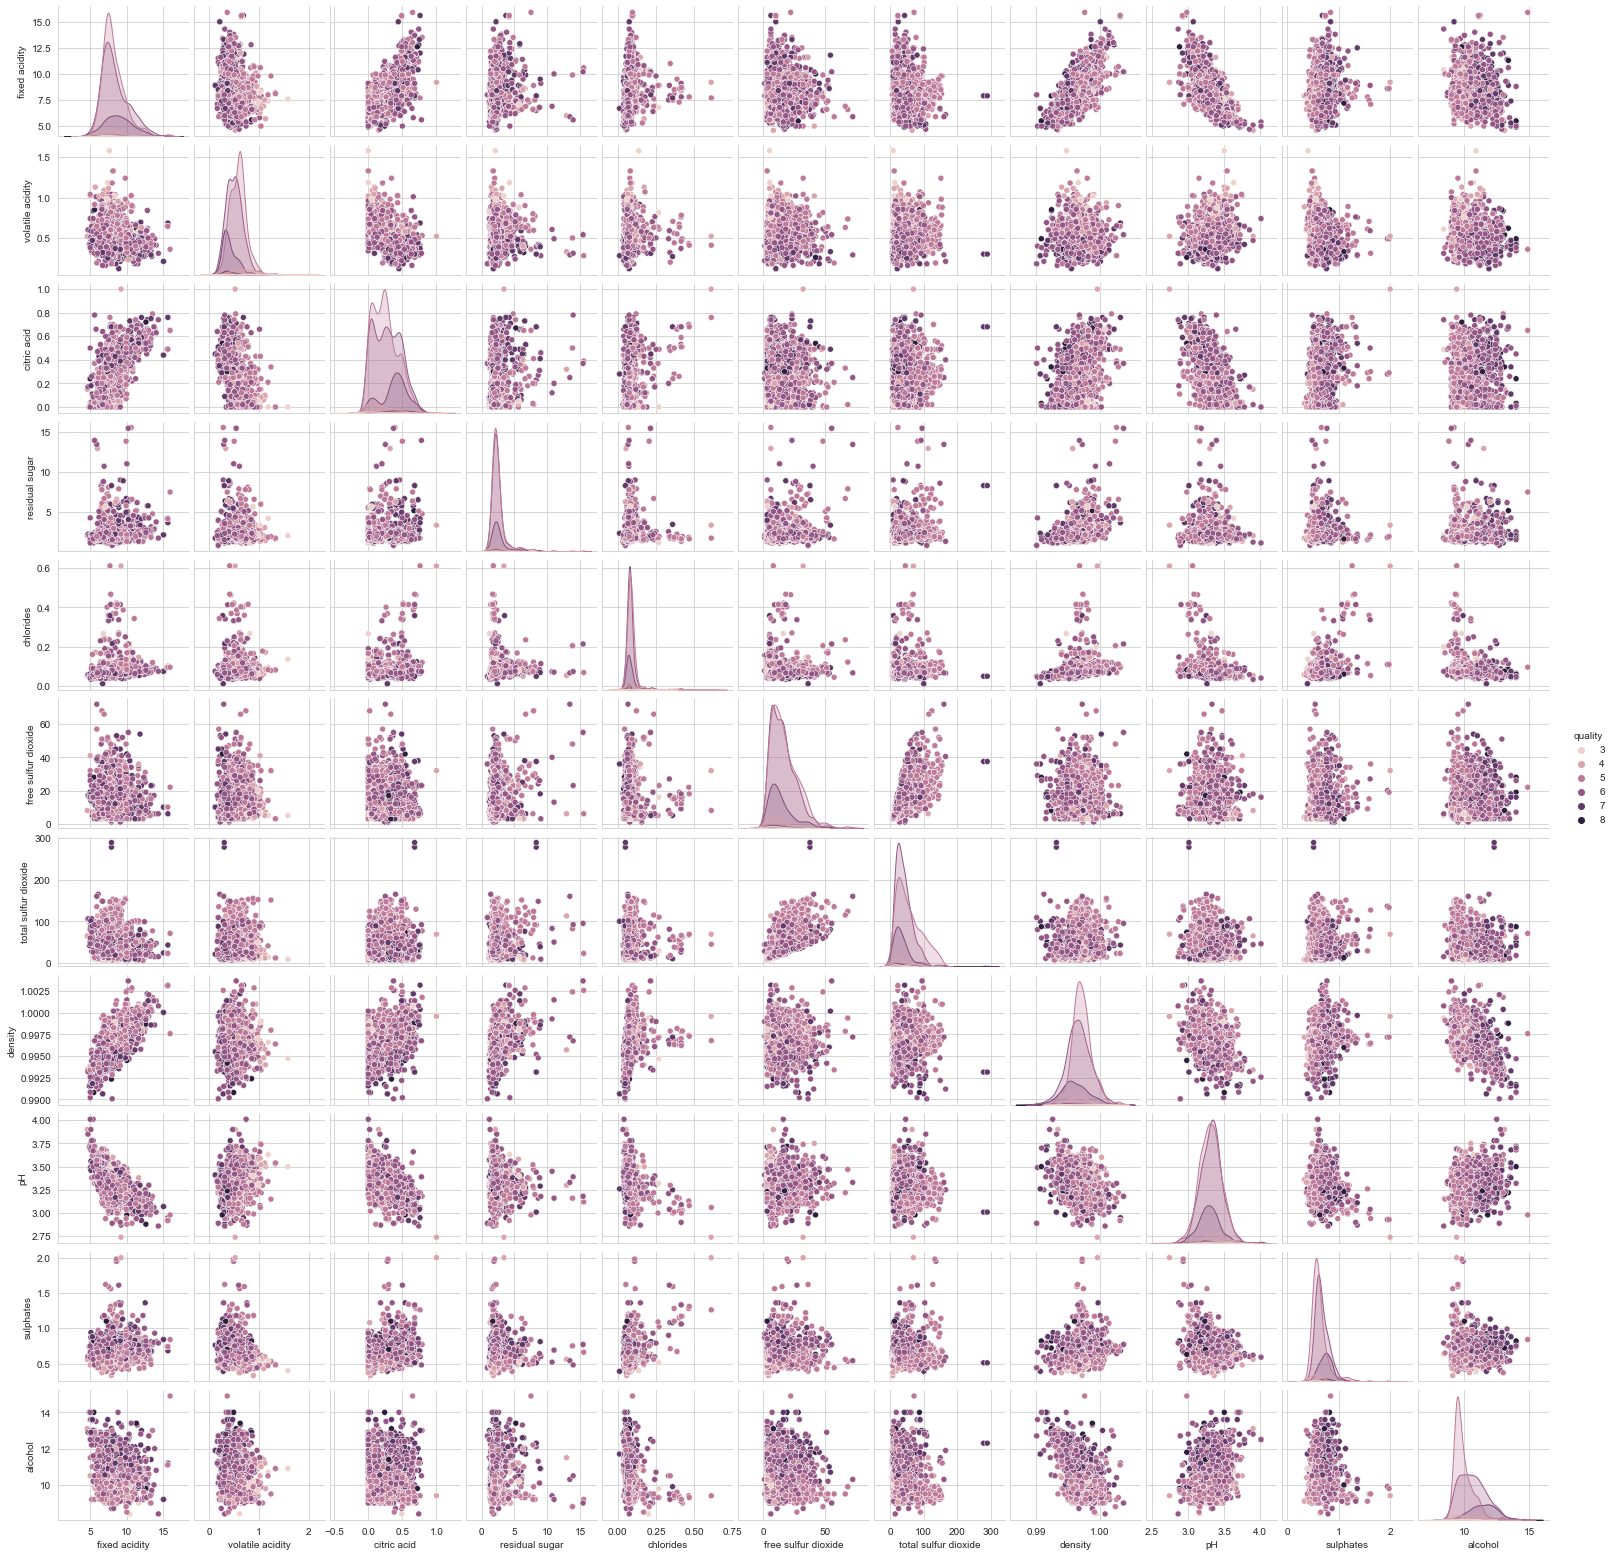

In [9]:
#pairplot 
sns.set_style("whitegrid");
sns.pairplot(df, hue="quality", size=2);
plt.show()

In [10]:
#using correlation see the relationship of data
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


here fixed acidity,citric acid,residual sugar,sulphates,alcohol have more weightage as compare to other feature

Text(0.5, 1.0, 'quality vs fixed acidity')

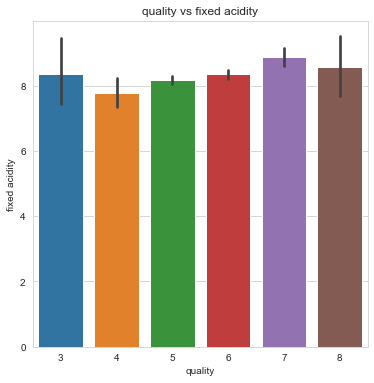

In [11]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.title('quality vs fixed acidity')

Text(0.5, 1.0, 'quality vs citric acid')

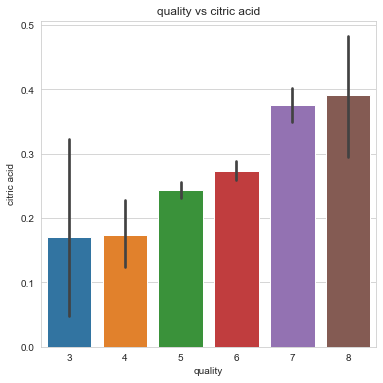

In [12]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.title('quality vs citric acid')

Text(0.5, 1.0, 'quality vs residual sugar')

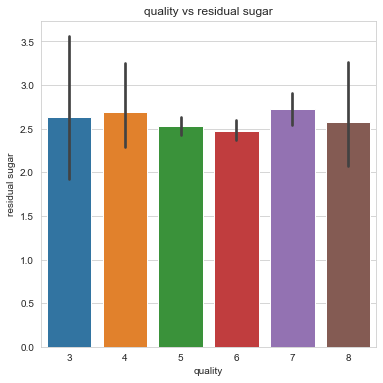

In [13]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.title('quality vs residual sugar')

<AxesSubplot:>

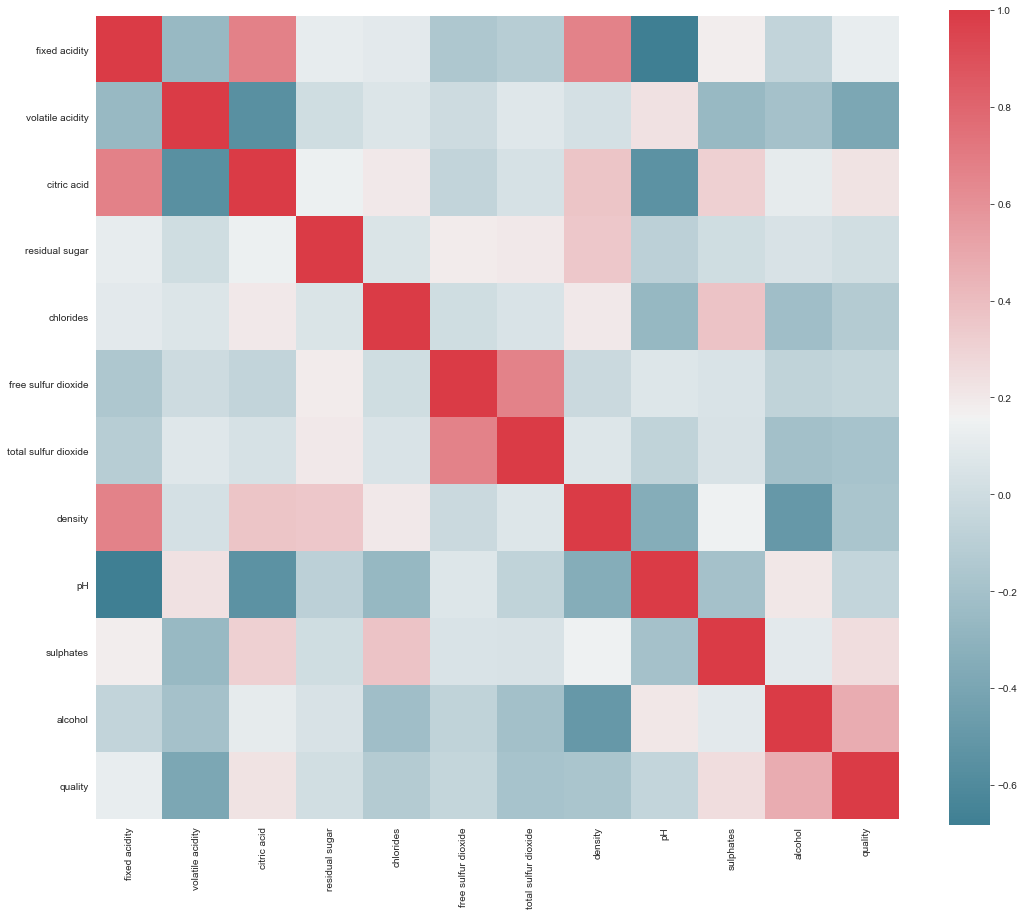

In [14]:
#using heatmap see the relationship of data
f, ax = plt.subplots(figsize=(18, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

here fixed acidity,citric acid,residual sugar,sulphates,alcohol have more weightage as compare to other feature

In [15]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
#converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']




df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [17]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64>

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

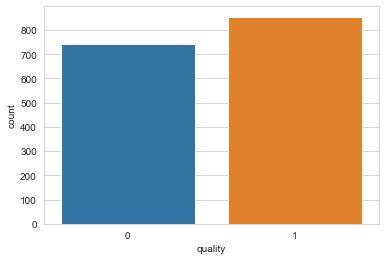

In [19]:
sns.countplot(df['quality'])

In [20]:
ss = StandardScaler()

In [21]:
x = df.drop('quality' , axis =1 )

In [22]:
y = df['quality']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [24]:
#use knn for data analysis
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
           

pred = knn.predict(x_test)

In [25]:
print(confusion_matrix(y_test,pred))


[[128  50]
 [ 62 160]]


Text(0, 0.5, 'Error Rate')

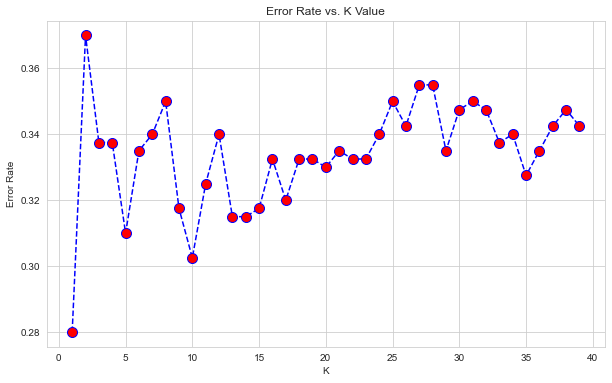

In [26]:
from matplotlib.figure import Figure
#Choosing a K Value

#Let's go ahead and use the elbow method to pick a good K Value:

error_rate = []


# Will take some time

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

#WITH K=20

WITH K=20


[[125  53]
 [ 79 143]]
0.67


In [28]:
print(accuracy_score(y_test,pred))

0.67


In [29]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.7431192660550459
Testing accuarcy : 0.74
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       178
           1       0.77      0.77      0.77       222

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

[[126  52]
 [ 52 170]]


/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training accuracy : 0.6305254378648875
Testing accuarcy : 0.64
              precision    recall  f1-score   support

           0       0.70      0.33      0.45       178
           1       0.62      0.89      0.73       222

    accuracy                           0.64       400
   macro avg       0.66      0.61      0.59       400
weighted avg       0.66      0.64      0.61       400

[[ 59 119]
 [ 25 197]]


In [31]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.7175
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       178
           1       0.76      0.72      0.74       222

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[127  51]
 [ 62 160]]


In [32]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training accuracy : 0.9924937447873228
Testing accuarcy : 0.8025
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       178
           1       0.83      0.81      0.82       222

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

[[141  37]
 [ 42 180]]


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [34]:
ac

0.74

In [35]:
cm

array([[133,  45],
       [ 59, 163]])

In [46]:
from sklearn.linear_model import SGDClassifier

# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.66      0.75      0.70       178
           1       0.77      0.69      0.73       222

    accuracy                           0.71       400
   macro avg       0.72      0.72      0.71       400
weighted avg       0.72      0.71      0.72       400



In [44]:
print("Acuracy Score :",ac)


Acuracy Score : 0.7075


In [45]:
print("Confusion Matrix : ", cm)

Confusion Matrix :  [[139  39]
 [ 78 144]]


conclusion : LogisticRegression and RandomForestClassifier gives us a best accuracy on train and test data